In [274]:
!pip install --user -q pandas-profiling  

ERROR: Could not find a version that satisfies the requirement train_xgboost (from versions: none)
ERROR: No matching distribution found for train_xgboost


# IMporting the libraries

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install jupyter_progressbar 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics


import xgboost

from keras.wrappers.scikit_learn import KerasClassifier

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import pandas_profiling
from pandas_profiling import ProfileReport
from train_xgboost import TrainXGBoost

Using TensorFlow backend.


ModuleNotFoundError: No module named 'train_xgboost'

In [ ]:
# importing the datast

In [4]:
data = pd.read_csv("./dota2Dataset/dota2Train.csv", header = None, )
data.reset_index(drop = True, inplace = True )

In [5]:
data 

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92645,-1,154,2,3,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
92646,1,154,2,2,0,0,0,0,-1,0,...,1,0,0,0,0,0,0,0,0,0
92647,1,111,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92648,-1,185,2,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = data.copy()
sum(list(df.isnull().sum()))#checking for null values  in the datsets

# Data Profiling

In [6]:
profile = ProfileReport(df, title = "Data data analysis", explorative = True)

In [7]:
profile.to_widgets()

KeyboardInterrupt: 

In [ ]:
profile.to_file("dota.html")

# Preprocess Data

In [6]:
def preprocess_dota (df):
    arr = [None]*92650 
    for i in range(len(arr)):
        team_1 = [False, False, False, False] + list(df.loc[i][4:] == 1)
        team_1 = [i for i, x in enumerate(team_1) if x]
        team_2 = [False, False, False, False] + list(df.loc[i][4:] == -1)
        team_2 = [i for i, x in enumerate(team_2) if x]
        arr[i] = team_1 +  team_2
    cols  = ["player_{}_{}".format(i, j) for i in range(1, 3) for j in range(1, 6)]
    df_players  = pd.DataFrame(data = arr, columns = cols)
    
    df = df.loc[:, 0:3]
    df[df[0] == -1][0] = 0
    df[1] = df[1].div(100)
    df = pd.concat([df, df_players], axis = 1)
    return df
    

In [7]:
df = data.copy()
df = preprocess_dota(df.copy())

C:\Users\naham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\naham\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df.head(5)

,0,1,2,3,player_1_1,player_1_2,player_1_3,player_1_4,player_1_5,player_2_1,player_2_2,player_2_3,player_2_4,player_2_5
0,-1,2.23,2,2,13,17,28,31,35,21,25,41,77,91
1,1,1.52,2,2,7,17,29,30,74,9,24,38,96,101
2,1,1.31,2,2,7,25,28,35,62,9,23,49,75,96
3,1,1.54,2,2,20,38,57,65,98,10,26,45,50,107
4,-1,1.71,2,3,19,34,39,47,76,9,12,14,32,89


# the correlation matrix

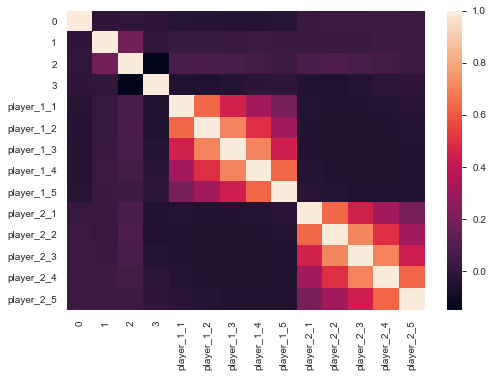

In [10]:
sns.heatmap(df.corr())

# Null value heat map

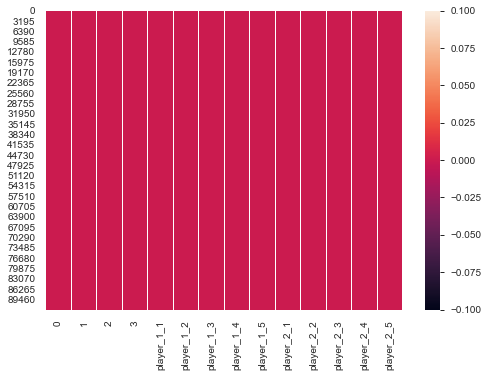

In [9]:
sns.heatmap(df.isna())

# Train test split

In [11]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.4, random_state = 10)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Model training 

In [13]:
#model 1: xgboost classifier(Grid seach cv)
params  = {
    "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30], 
    "max_depth" : [3, 4,5,6,8,10,12,15],
    "min_child_weights": [1, 3, 5, 7], 
    "gamma" : [0.0, 0.1, 0.2, 0.3, 0.4], 
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7], 
    "n_estimators" :[500]
}

In [14]:
classifier2 = xgboost.XGBClassifier()

model tunuing using randomized search cv

In [15]:
k = StratifiedKFold(n_splits=5)
random_search = RandomizedSearchCV(classifier2, param_distributions = params,
                                  scoring = "roc_auc", n_jobs =-1, 
                                  verbose = 2, cv = k)

In [16]:
random_search.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='b...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gam

In [17]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.25, max_delta_step=0, max_depth=4,
              min_child_weight=1, min_child_weights=1, missing=None,
              n_estimators=500, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

Model fitting

In [18]:
classifier2 = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.25, max_delta_step=0, max_depth=4,
              min_child_weight=1, min_child_weights=1, missing=None,
              n_estimators=500, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)
classifier2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.25, max_delta_step=0, max_depth=4,
              min_child_weight=1, min_child_weights=1, missing=None,
              n_estimators=500, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [19]:
y_pred = classifier2.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.5784673502428495

In [403]:
tn, fp, fn, tp = confusion_matrix(y_test , y_pred).ravel()
(tn, fp, fn, tp)

(7217, 10290, 5582, 13971)

# Saving the model

In [404]:
import joblib
#save model
joblib.dump(classifier2, "xgbclassifier")

['xgbclassifier']

In [406]:
y_pred

array([ 1,  1, -1, ...,  1, -1,  1], dtype=int64)